# Customer Segmentation

For this project I will use the [Wholesale customers](https://archive.ics.uci.edu/dataset/292/wholesale+customers) dataset from UC Irvine.

The pupose of the project is to use customers to segment customers based on purchased items to help find patterns that could help wholesalers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    # Load the dataset
    data = pd.read_csv("./Wholesale customers data.csv")
    
    # Remove the 'Channel' and 'Region' columns from the dataset
    data.drop(labels=['Channel', 'Region'], axis=1, inplace=True)
    
    # Print the number of samples and features in the dataset
    print(f"Wholesale customers dataset has {data.shape[0]} samples with {data.shape[1]} features each.")
except FileNotFoundError:
    print("Sorry! The dataset could not be found.")
except Exception as e:
    print(f"An error occurred: {e}")

Wholesale customers dataset has 440 samples with 6 features each.


## EDA
In the initial phase of my unsupervised learning project for customer segmentation, I conducted an Exploratory Data Analysis (EDA) to deeply understand the dataset and prepare it for effective clustering. This EDA was comprehensive, focusing on several crucial aspects to ensure the data was optimally conditioned for analysis.

I began with generating descriptive statistics for each feature, which included measures such as mean, median, standard deviation, and quartiles. This step was essential for grasping the central tendencies and variabilities within the data. It helped in identifying the scale and distribution of features, providing preliminary insights into potential outliers and data spread, which are pivotal for understanding how each feature might affect cluster formation.

Following this, I checked for missing values across the dataset. Addressing missing data is critical as most clustering algorithms, including the ones planned for this project, require complete datasets to function correctly. Identifying and imputing missing values ensured that the analysis would not be skewed or biased, maintaining the integrity of the clustering process.

To further explore the data, I analyzed the distribution of each feature using histograms and density plots. This examination was targeted to uncover the shape of each distribution—be it normal, skewed, or bimodal—and to confirm the presence of outliers. Understanding these distributions was crucial because it influenced decisions on data transformation and normalization, which could significantly impact the performance and outcome of the clustering algorithms.

Additionally, I performed a correlation analysis using a heatmap to visualize the relationships between different features. This analysis was important for identifying whether features were independent predictors or if multicollinearity existed. High correlations between variables might suggest redundancy, and in such cases, dimensionality reduction techniques such as PCA could be considered to simplify the model without losing critical information.

Lastly, outlier detection was performed using boxplots and statistical tests. Since clustering algorithms like K-means are sensitive to outliers—as they tend to skew the calculation of centroids—it was vital to detect and address outliers appropriately to ensure that the clusters formed would genuinely represent the underlying patterns and not be artifacts of anomalous data points.

In [12]:
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
                Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


In [13]:
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


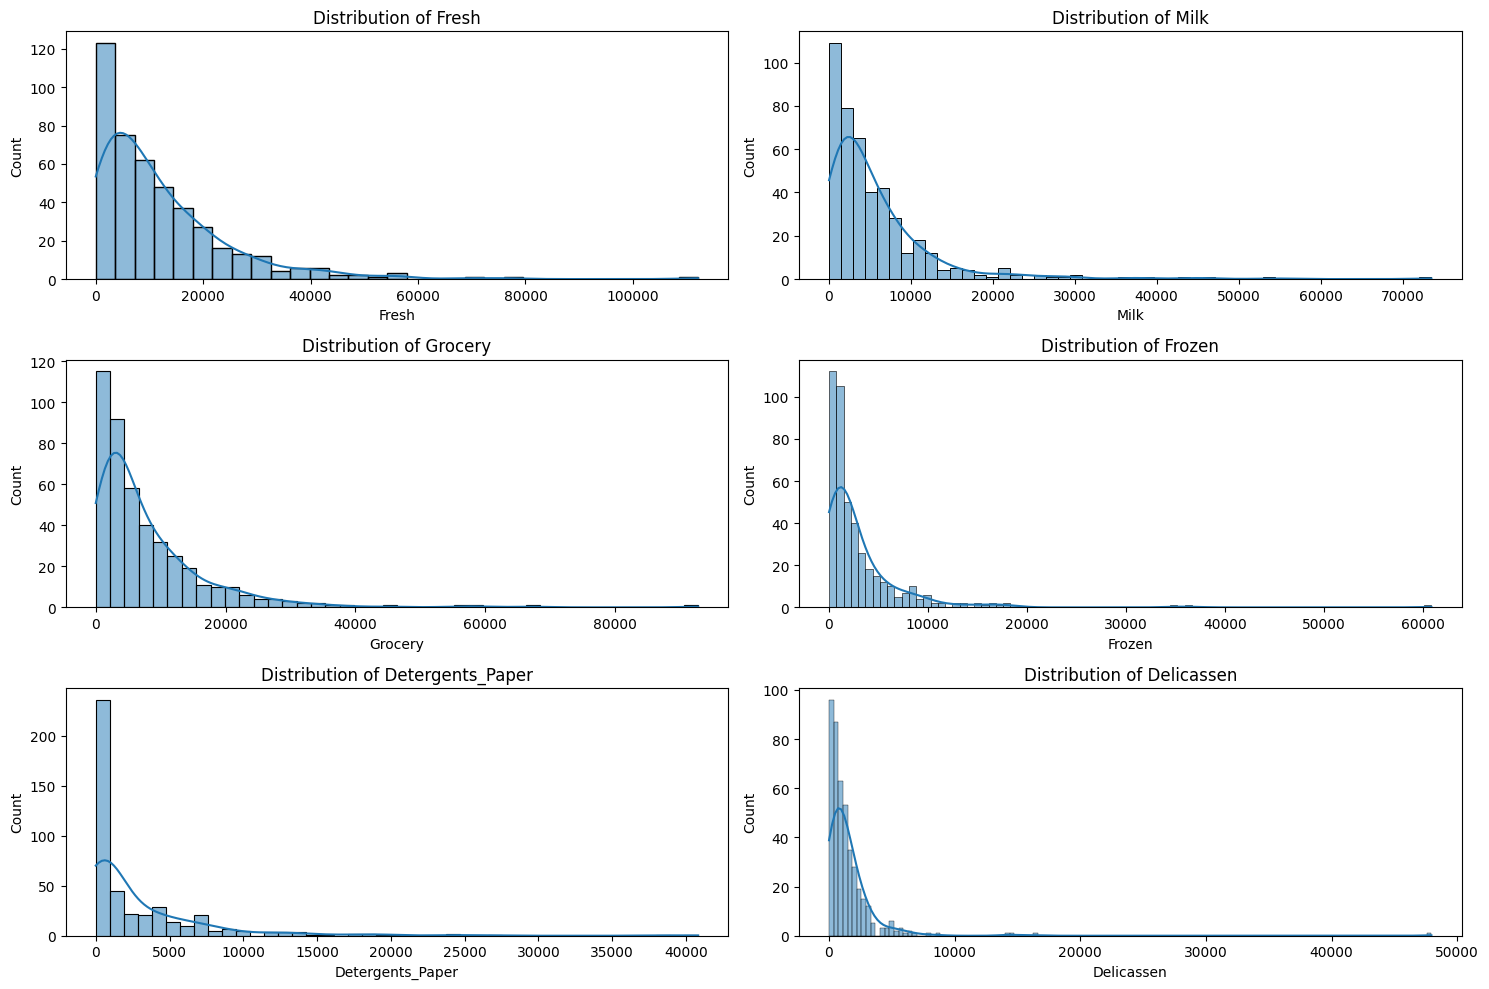

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, col in enumerate(data.columns):
    ax = axs[i//2, i%2]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix')

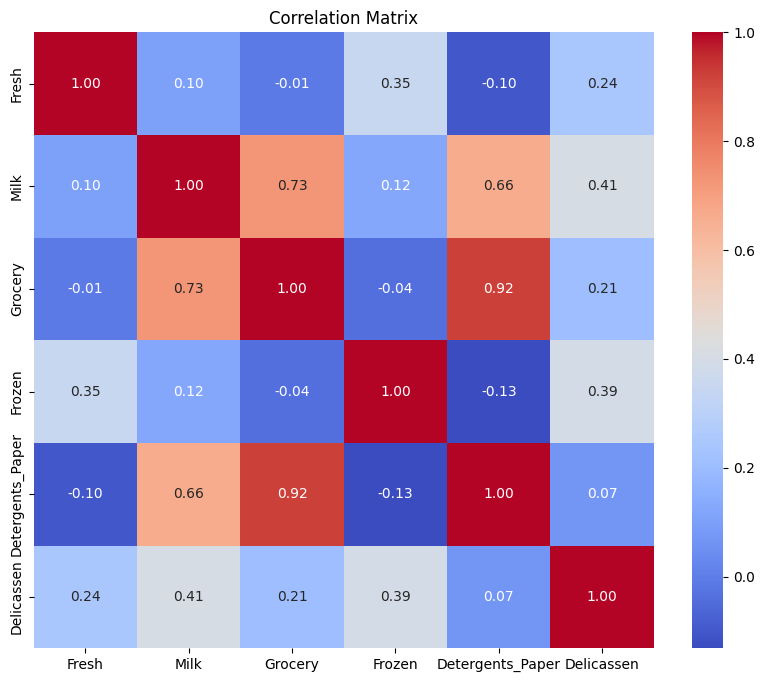

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

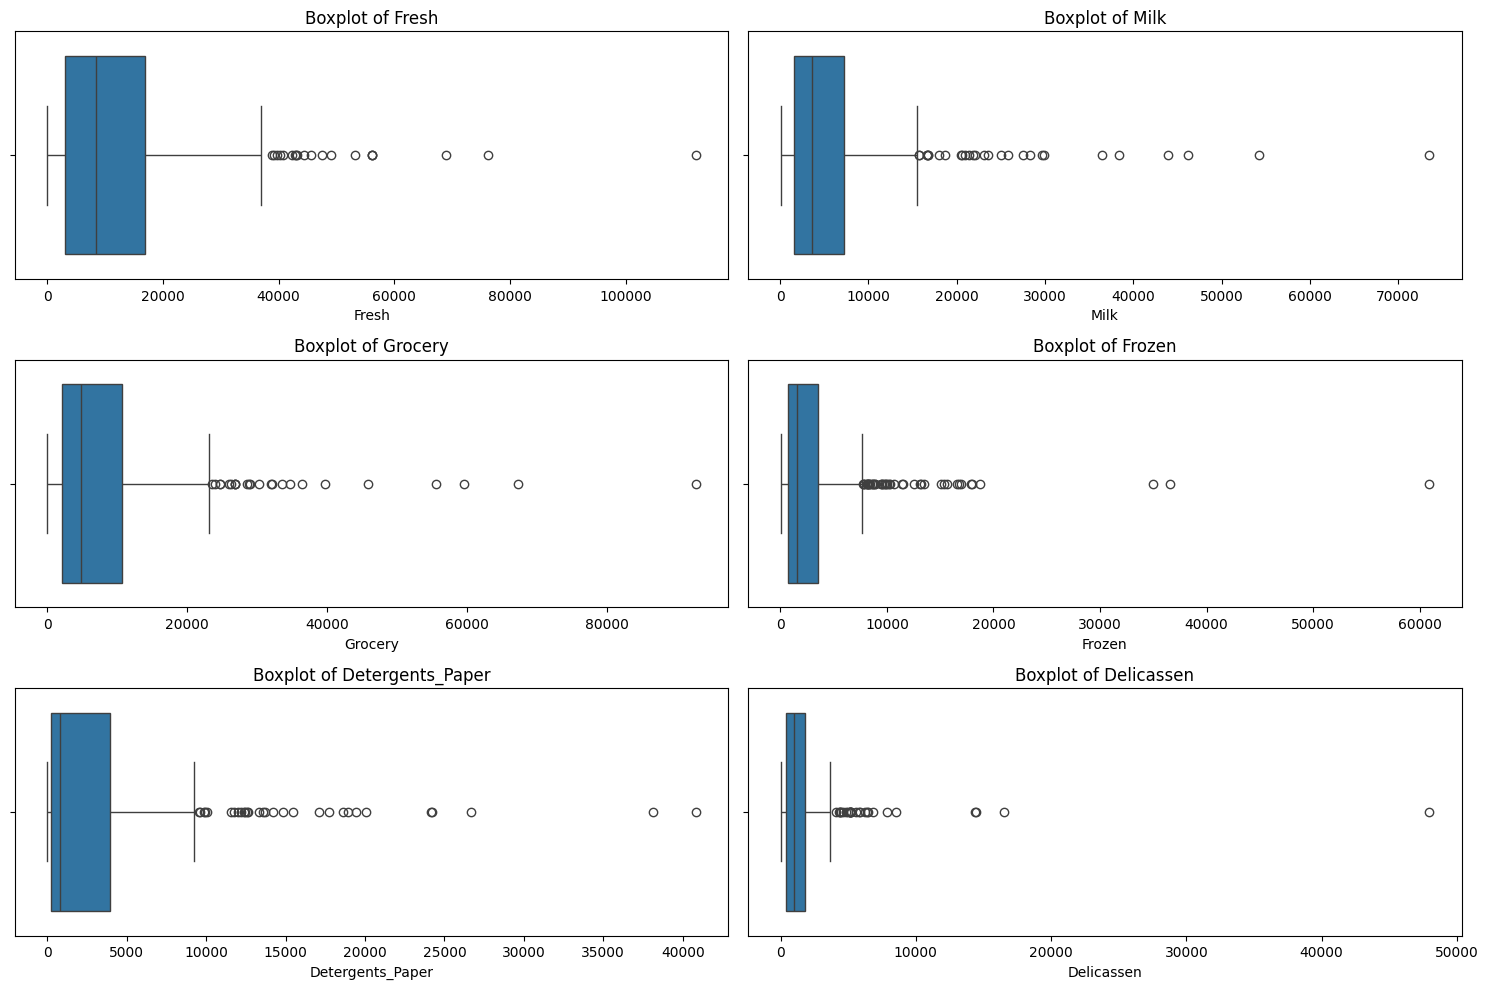

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, col in enumerate(data.columns):
    ax = axs[i//2, i%2]
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()

## Data Preparation
Based on the EDA it I will perform feature scaling and detection and potential removal of data outliers. This will ensure the data will be meaningful for the analysis

In [19]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

# Detecting outliers using the Z-score
z_scores = np.abs(stats.zscore(scaled_data_df))
outliers = (z_scores > 3).any(axis=1)

# Optionally remove outliers
cleaned_data = scaled_data_df[~outliers]

print("Data after scaling:")
print(scaled_data_df.head())
print("\nDetected outliers (first 5 instances):")
print(data[outliers].head())

# If you decide to remove outliers
print("\nData after removing outliers:")
print(cleaned_data.head())

Data after scaling:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347

Detected outliers (first 5 instances):
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
23  26373  36423    22019    5154              4337       16523
39  56159    555      902   10002               212        2916
47  44466  54259    55571    7782             24171        6465
56   4098  29892    26866    2616             17740        1340
61  35942  38369    59598    3254             26701        2017

Data after removing outliers:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568

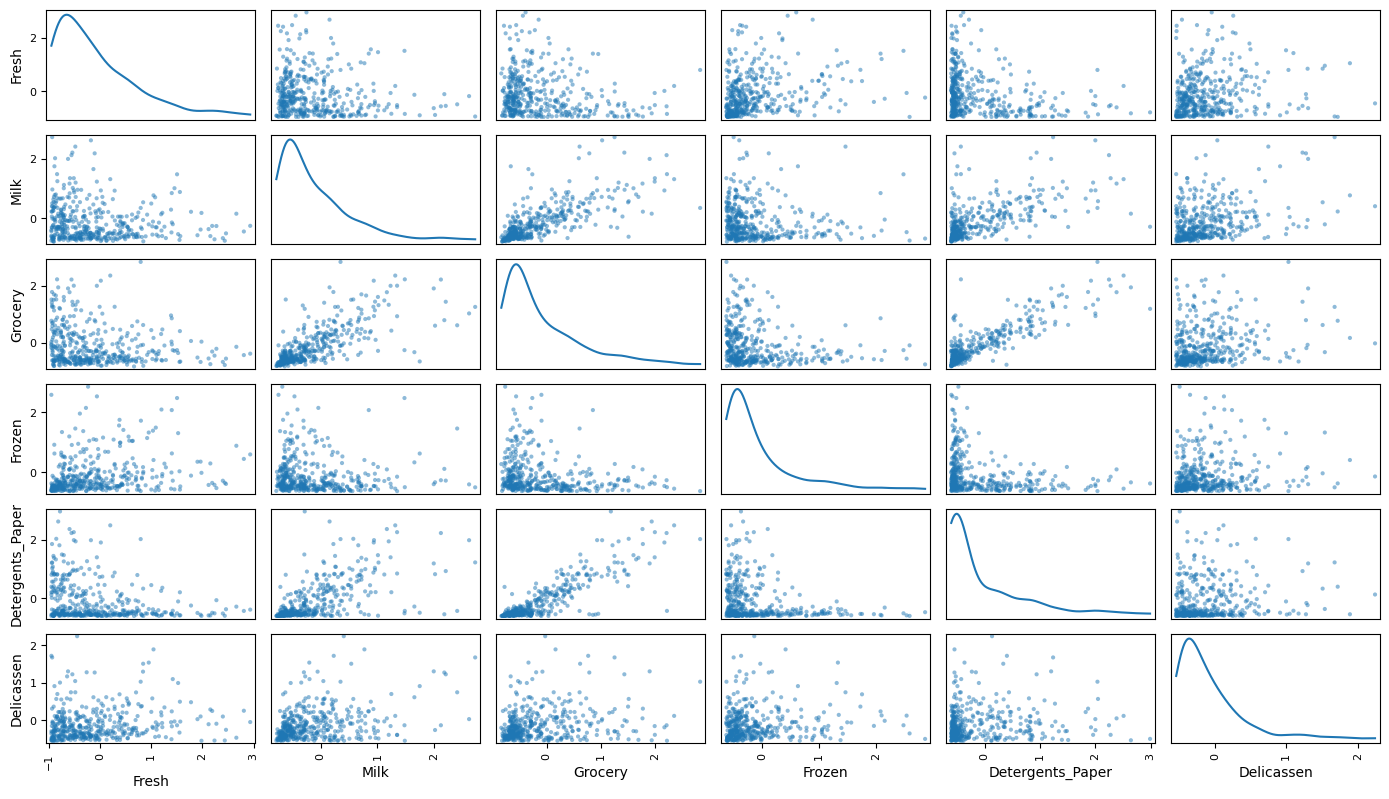

In [20]:
pd.plotting.scatter_matrix(cleaned_data, alpha=0.5, figsize=(14, 8), diagonal='kde')
plt.tight_layout()
plt.show()

## Implementation and Experimentation

I will explore various clustering algorithms to segment our customer base effectively. I've chosen K-means clustering for its simplicity and efficiency, and I plan to determine the optimal number of clusters by assessing the inertia and silhouette scores for a range of cluster counts. Hierarchical clustering will also be employed, using both agglomerative and divisive techniques, to understand the natural hierarchy within the data. Its dendrogram will serve as a visual tool for determining cluster counts. Additionally, DBSCAN will be utilized for its ability to find arbitrarily shaped clusters and to handle noise and outliers effectively. Lastly, Gaussian Mixture Models (GMM) will be considered for their flexibility in accommodating clusters of different sizes and shapes due to their probabilistic nature.

For each model, I intend to fine-tune the parameters through experimentation to achieve optimal segmentation. In K-means, the number of clusters (k) will be the primary parameter of interest. For hierarchical clustering, different linkage criteria such as Ward's method, average, complete, and single linkage will be tested. With DBSCAN, the minimum samples in a neighborhood and the epsilon distance will be critical parameters. In the case of GMM, the number of components and covariance type will be tuned. I plan to use cross-validation grids where applicable, to methodically explore the parameter space. The evaluation of clustering outcomes will be based on metrics suitable for each method, ensuring the robustness and validity of the segments identified.

### K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

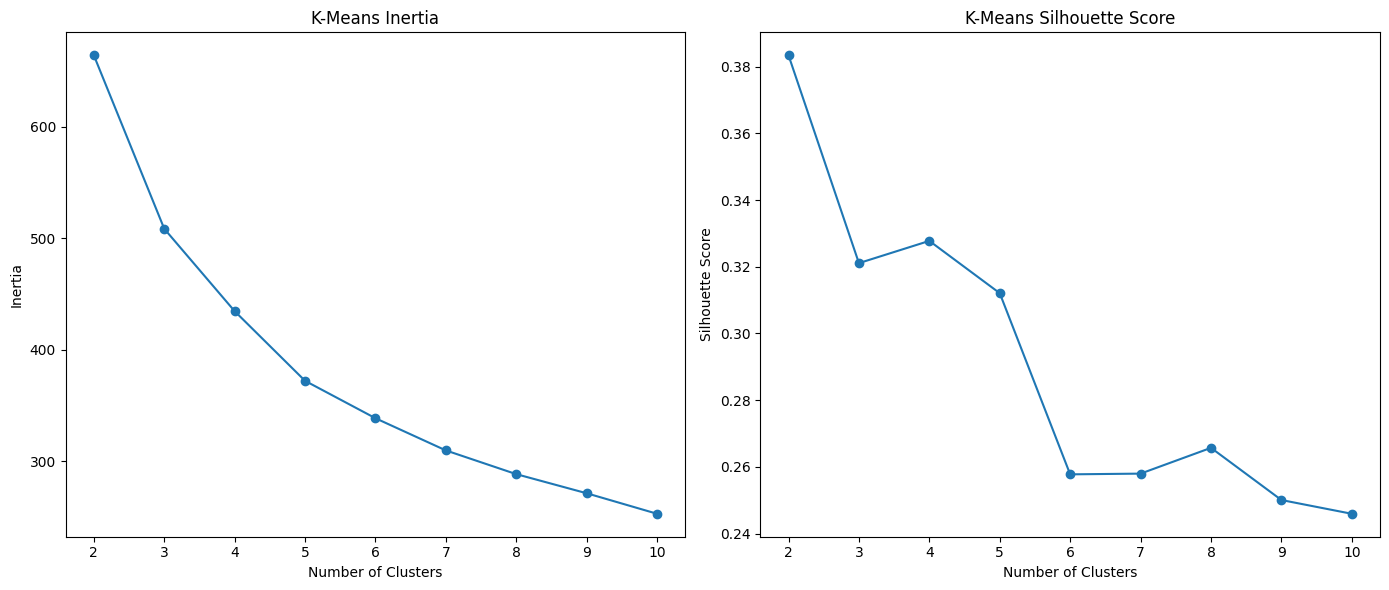

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Assuming 'cleaned_data' is the preprocessed and scaled dataset ready for clustering
data = cleaned_data

# Determine the range for the number of clusters to test
cluster_range = range(2, 11)

# Initialize an empty list to store the evaluation metrics for each model
kmeans_results = []

for k in cluster_range:
    # Initialize the KMeans algorithm with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Calculate the cluster labels
    cluster_labels = kmeans.labels_
    
    # Evaluate the model using the silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    # Store the results
    kmeans_results.append({
        'n_clusters': k,
        'inertia': kmeans.inertia_,
        'silhouette_score': silhouette_avg
    })

# Convert the results list to a DataFrame for easy analysis and plotting
kmeans_results_df = pd.DataFrame(kmeans_results)

# Plot the evaluation metrics as a function of the number of clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(kmeans_results_df['n_clusters'], kmeans_results_df['inertia'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-Means Inertia')

plt.subplot(1, 2, 2)
plt.plot(kmeans_results_df['n_clusters'], kmeans_results_df['silhouette_score'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Means Silhouette Score')

plt.tight_layout()
plt.show()

### Hierarchical Clustering

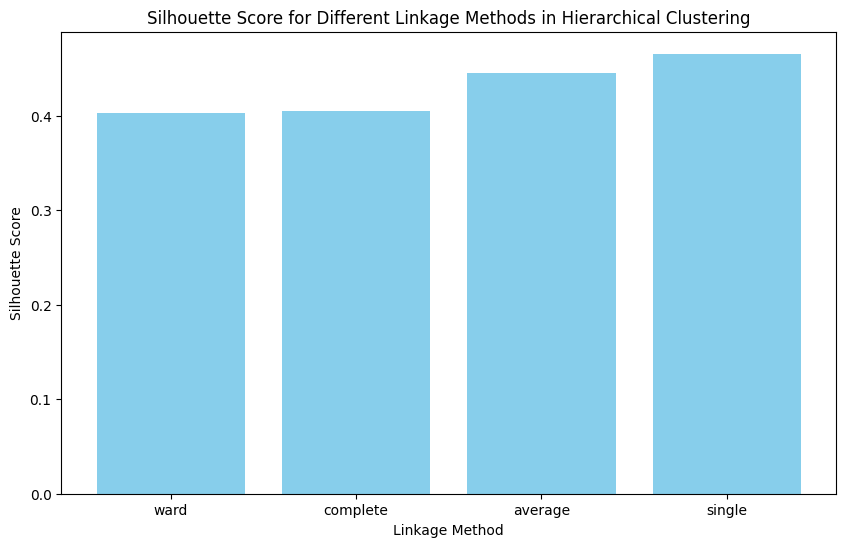

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Parameters to tune
linkage_methods = ['ward', 'complete', 'average', 'single']

# Store the results
hierarchical_results = []

# Apply each linkage method to the data
for method in linkage_methods:
    # Fit the hierarchical clustering algorithm
    hc = AgglomerativeClustering(linkage=method)
    cluster_labels = hc.fit_predict(data)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    # Append results to the list
    hierarchical_results.append({
        'linkage_method': method,
        'silhouette_score': silhouette_avg
    })

# Convert to DataFrame
hierarchical_results_df = pd.DataFrame(hierarchical_results)

plt.figure(figsize=(10, 6))
plt.bar(hierarchical_results_df['linkage_method'], hierarchical_results_df['silhouette_score'], color='skyblue')
plt.xlabel('Linkage Method')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Linkage Methods in Hierarchical Clustering')
plt.show()

### DBSCAN

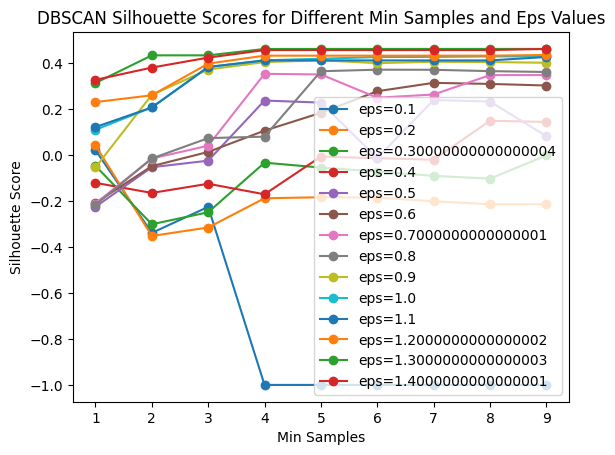

In [26]:
from sklearn.cluster import DBSCAN

# Parameters to tune
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(1, 10)

# Store the results
dbscan_results = []

# Grid search over eps_values and min_samples_values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(data)
        
        # A meaningful silhouette score can only be calculated with more than 1 cluster and less clusters than samples
        if len(set(cluster_labels)) > 1 and len(set(cluster_labels)) < len(data):
            silhouette_avg = silhouette_score(data, cluster_labels)
        else:
            silhouette_avg = -1  # Assign a default bad score
        
        # Append results to the list
        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'num_clusters': len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0),
            'silhouette_score': silhouette_avg
        })

# Convert to DataFrame
dbscan_results_df = pd.DataFrame(dbscan_results)

for eps in eps_values:
    eps_df = dbscan_results_df[dbscan_results_df['eps'] == eps]
    plt.plot(eps_df['min_samples'], eps_df['silhouette_score'], marker='o', label=f'eps={eps}')

plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Silhouette Scores for Different Min Samples and Eps Values')
plt.legend()
plt.show()

### Gaussian Mixture Models

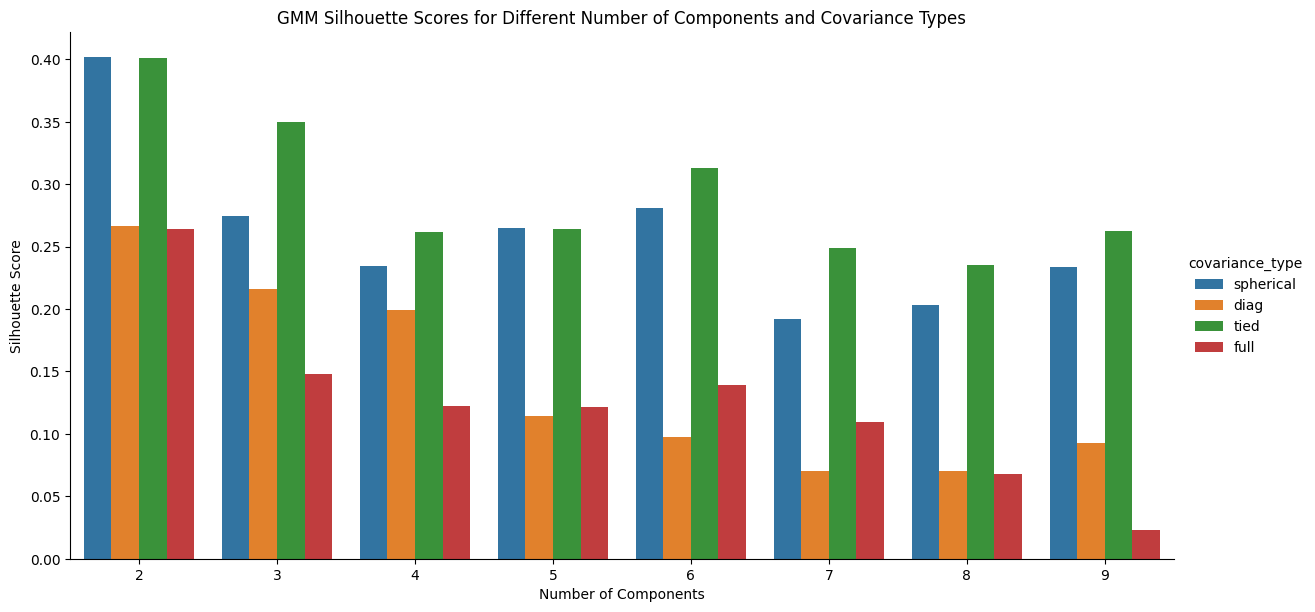

In [29]:
from sklearn.mixture import GaussianMixture

# Parameters to tune
n_components_range = range(2, 10)
covariance_types = ['spherical', 'diag', 'tied', 'full']

# Store the results
gmm_results = []

# Grid search over the range of components and covariance types
for n_components in n_components_range:
    for covariance_type in covariance_types:
        # Fit GMM
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        gmm.fit(data)
        cluster_labels = gmm.predict(data)
        
        # Calculate the silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)
        
        # Append results to the list
        gmm_results.append({
            'n_components': n_components,
            'covariance_type': covariance_type,
            'silhouette_score': silhouette_avg
        })

# Convert to DataFrame
gmm_results_df = pd.DataFrame(gmm_results)


# Assume gmm_results_df is your DataFrame from the GMM experiment
sns.catplot(x="n_components", y="silhouette_score", hue="covariance_type",
            kind="bar", data=gmm_results_df, height=6, aspect=2)

plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('GMM Silhouette Scores for Different Number of Components and Covariance Types')
plt.show()

### Comparison

To compare the different clustering approaches, we will gather the evaluation metrics—specifically the silhouette scores—from the output DataFrames of each clustering experiment. 

In [30]:
best_kmeans = kmeans_results_df.loc[kmeans_results_df['silhouette_score'].idxmax()]
best_hierarchical = hierarchical_results_df.loc[hierarchical_results_df['silhouette_score'].idxmax()]
best_dbscan = dbscan_results_df.loc[dbscan_results_df['silhouette_score'].idxmax()]
best_gmm = gmm_results_df.loc[gmm_results_df['silhouette_score'].idxmax()]

# Now, we'll create a summary DataFrame to compare these results
comparison_df = pd.DataFrame({
    'Clustering Approach': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Best Silhouette Score': [
        best_kmeans['silhouette_score'],
        best_hierarchical['silhouette_score'],
        best_dbscan['silhouette_score'],
        best_gmm['silhouette_score']
    ],
    'Optimal Parameters': [
        f"n_clusters={best_kmeans['n_clusters']}",
        f"linkage_method={best_hierarchical['linkage_method']}",
        f"eps={best_dbscan['eps']}, min_samples={best_dbscan['min_samples']}",
        f"n_components={best_gmm['n_components']}, covariance_type={best_gmm['covariance_type']}"
    ]
})

# Find the best overall approach based on the silhouette score
best_overall_approach = comparison_df.loc[comparison_df['Best Silhouette Score'].idxmax()]

# Display the comparison DataFrame and the best overall approach
print("Comparison of Clustering Approaches:")
print(comparison_df)
print("\nBest Overall Clustering Approach:")
print(best_overall_approach)

Comparison of Clustering Approaches:
  Clustering Approach  Best Silhouette Score  \
0             K-Means               0.383420   
1        Hierarchical               0.465801   
2              DBSCAN               0.460993   
3                 GMM               0.401734   

                          Optimal Parameters  
0                             n_clusters=2.0  
1                      linkage_method=single  
2    eps=1.3000000000000003, min_samples=5.0  
3  n_components=2, covariance_type=spherical  

Best Overall Clustering Approach:
Clustering Approach               Hierarchical
Best Silhouette Score                 0.465801
Optimal Parameters       linkage_method=single
Name: 1, dtype: object


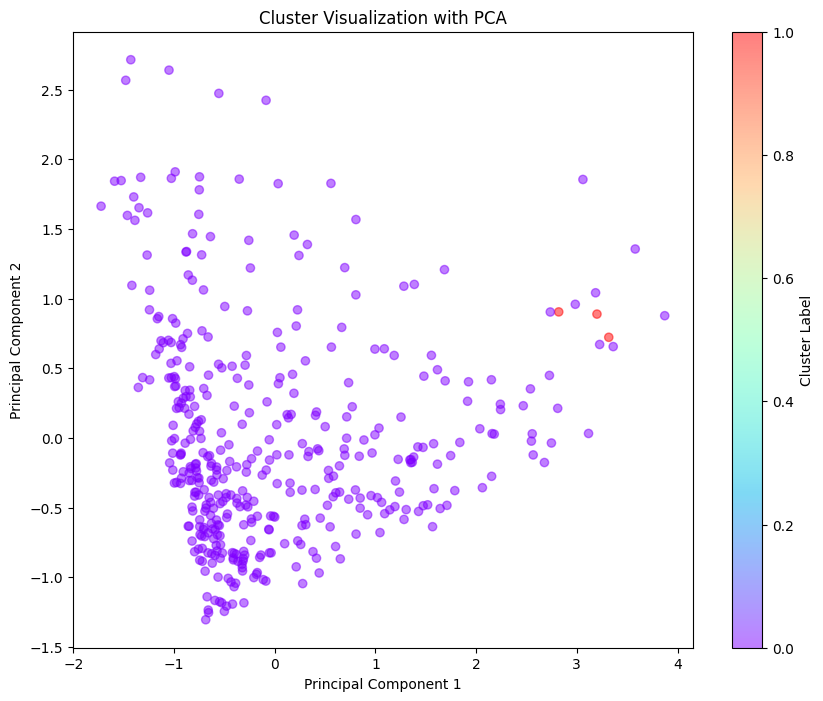

In [33]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Perform PCA to reduce data to two dimensions for visualization
num_clusters = 2  

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

hc = AgglomerativeClustering(n_clusters=num_clusters, linkage='single')  
cluster_labels = hc.fit_predict(data)
reduced_data_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_df['PC1'], reduced_data_df['PC2'], c=cluster_labels, cmap='rainbow', alpha=0.5)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Conclusion
The comparison of clustering approaches reveals Hierarchical Clustering with a single linkage method as the superior model for this dataset, yielding the highest silhouette score of 0.465801. This outcome indicates a more distinct separation between clusters compared to K-Means, DBSCAN, and GMM. With the optimal setting of a single linkage method, Hierarchical Clustering efficiently captures the underlying patterns in customer purchasing behavior.

This quantitative analysis suggests that Hierarchical Clustering is better suited for the current segmentation task. The next steps will involve a qualitative review of the resulting clusters to ensure they provide meaningful and actionable insights. The goal is to apply the clustering outcomes to refine our marketing strategies and enhance customer engagement, backed by the statistical confidence provided by the silhouette scores.